# <center> TP 2: Regularised Regression and Logistic Regression<br> <small>Réda DEHAK<br> 19 and 22 November 2018</small> </center>

The goal of this lab is :
    - Fit generalised linear models with ridge, Lasso or Elastic Net regularisations
    - Test the logistic regression on classification problems
    
We will use a data file that contain different measurements of height (variable y) of an individual sample according to the age (variable x).

## Part 1: Regularised Regression 
### Import Data

The following dataset is from Hastie, Tibshirani and Friedman (2009), from a study by Stamey et al. (1989) of prostate cancer, measuring the correlation between the level of a prostate-specific antigen and some covariates. The covariates are
- lcavol : log-cancer volume
-  lweight : log-prostate weight
-  age : age of patient
-  lbhp : log-amount of benign hyperplasia
-  svi : seminal vesicle invasion
-  lcp : log-capsular penetration
-  gleason : Gleason Score,
-  lpsa is the response variable, log-psa.

In [1]:
%pylab
%matplotlib inline
import pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
fin = open('data2.pkl', 'rb')
xtrain = pickle.load(fin)
ytrain = pickle.load(fin)
Xtest = pickle.load(fin)
Ytest = pickle.load(fin)
fin.close()

print('Train data : ', xtrain.shape, ' ', ytrain.shape)
print('Test data : ', Xtest.shape, ' ', Ytest.shape)

Train data :  (7, 60)   (60,)
Test data :  (7, 37)   (37,)


### Linear Regression

Using the program of TP 1, compute the linear regression weight $w$

$$y = g(x) = W^T x =\sum_{d=0}^7 w_d x_d$$
with $x_0 = 1$

The linear regression consists in finding the parameters $W$ which minimizes the 
quadratic error:
$$E(W) = \frac{1}{60}\sum_{i=1}^{60}\left(g(x_i) - y_i\right)^2$$

The vector $W$ which minimize $E(W)$ is defined as follow:
$$W = (X X^T)^{-1}X Y$$

Compute the vector $W$ wich minimize $E(W)$ :
- Compute $w$ using the exact solution
- Compute the error on test data

In [3]:
X = np.ones((xtrain.shape[0] + 1, xtrain.shape[1]))
X[1:,:] = xtrain

W = np.linalg.inv(X @ X.T) @ X @ ytrain

In [4]:
xtest = np.ones((Xtest.shape[0] + 1, Xtest.shape[1]))
xtest[1:, :] = Xtest
g = W @ xtest
error = np.mean((g - Ytest) ** 2)
print('Error: ', error)

Error:  2.8641499657015723


- Check that you obtain the same $W$ with sklean.linear_model.LinearRegression?

In [5]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(xtrain.T, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
np.mean((lr.predict(Xtest.T) - Ytest) ** 2)

2.864149965701443

### Ridge regression

The ridge regression consists in finding the parameters $W$ which minimizes:
$$\frac{1}{60}\sum_{i=1}^{60}\left(W^T x_i - y_i\right)^2 + \alpha \|W\|_2^2$$ 

- Using linear_model.Ridge and $\alpha = 0.$, check that you obtain the same $W$ as linear regression

In [7]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0)
rr.fit(xtrain.T, ytrain)
print(np.mean((rr.predict(Xtest.T) - Ytest) ** 2))

2.864149965701439


In this part, we will check the influence of $\alpha$ on the solution of the linear regression

- Train a ridge regression with different values of $\alpha$ = np.logspace(-5, 5, 200)
- Plot how evolve each $W_i$ through the sequence of $\alpha$ values.
- Plot how evolve the mean square error through the sequence of $\alpha$ values.
- Conclude

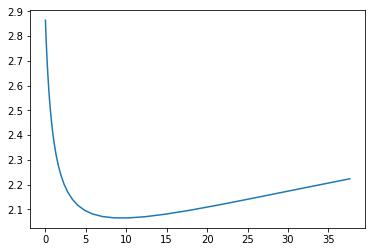

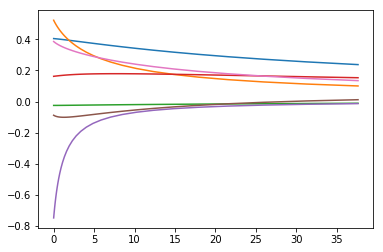

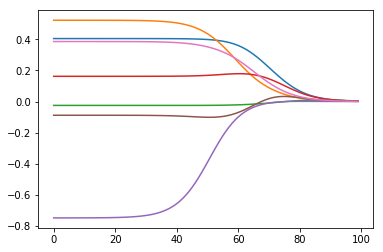

In [23]:
alphas = np.logspace(-4, 4, 100)
Ws = []
errors_ridge = []
for a in alphas:
    rr = Ridge(alpha=a)
    rr.fit(xtrain.T, ytrain)
    Ws.append(rr.coef_)
    errors_ridge.append(np.mean((rr.predict(Xtest.T) - Ytest) ** 2))

plt.plot(alphas[:70], errors_ridge[:70])
plt.show()

for i in range(len(Ws[0])):
    l = [W[i] for W in Ws]
    plt.plot(alphas[:70], l[:70])

plt.show()

for i in range(len(Ws[0])):
    l = [W[i] for W in Ws]
    plt.plot(l)

plt.show()

In [11]:
print(alphas[60])

7.054802310718645


We can see that when the $\alpha$ parameter increases, the $W_i$ factors are converging to 0. This means that our model is underfitting, because our regularisation is too strong. The $W_i$ start converging after $\alpha=7$, a value which is corresponding to when the error starts increasing again.

### Lasso regression

The ridge regression consists in finding the parameters $W$ which minimizes:
$$\frac{1}{2 \times 60}\sum_{i=1}^{60}\left(W^T x_i - y_i\right)^2 + \alpha \|W\|_1$$

- Using linear_model.Lasso and $\alpha = 0.$, check that you obtain the same $W$ as linear regression

In [24]:
from sklearn.linear_model import Lasso
lar = Lasso(alpha=0)
lar.fit(xtrain.T, ytrain)
print(np.mean((lar.predict(Xtest.T) - Ytest) ** 2))

2.8641499657014404


/home/nicolas/.anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  This is separate from the ipykernel package so we can avoid doing imports until
/home/nicolas/.anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/home/nicolas/.anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In this part, we will check the influence of $\alpha$ on the solution of the linear regression

- Train a Lasso regression with different values of $\alpha$ = np.logspace(-5, 5, 200)
- Plot how evolve each $W_i$ through the sequence of $\alpha$ values.
- Plot how evolve the mean square error through the sequence of $\alpha$ values.

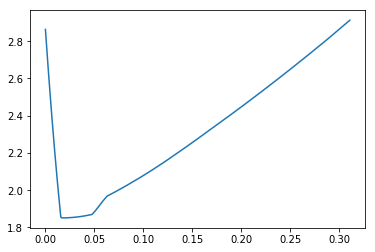

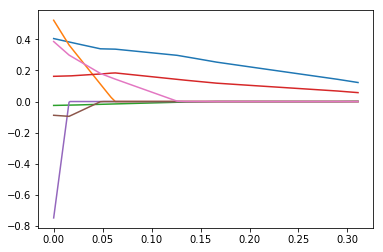

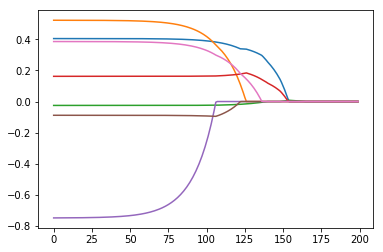

In [34]:
alphas = np.logspace(-5, 1, 200)
Ws = []
errors_lasso = []
for a in alphas:
    lar = Lasso(alpha=a)
    lar.fit(xtrain.T, ytrain)
    Ws.append(lar.coef_)
    errors_lasso.append(np.mean((lar.predict(Xtest.T) - Ytest) ** 2))

plt.plot(alphas[:150], errors_lasso[:150])
plt.show()

for i in range(len(Ws[0])):
    l = [W[i] for W in Ws]
    plt.plot(alphas[:150], l[:150])
    
plt.show()
for i in range(len(Ws[0])):
    l = [W[i] for W in Ws]
    plt.plot(l)
    
plt.show()

Compare the result with ridge solution?

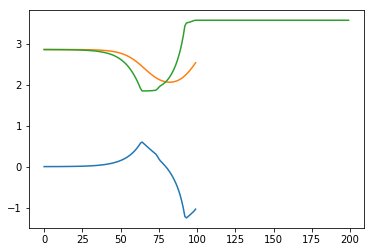

In [15]:
plt.plot([e1 - e2 for (e1, e2) in zip(errors_ridge, errors_lasso)])
plt.plot(errors_ridge)
plt.plot(errors_lasso)

### Elastic Net regression

The ridge regression consists in finding the parameters $W$ which minimizes:
$$\frac{1}{2 \times 60}\sum_{i=1}^{60}\left(W^T x_i - y_i\right)^2 + \alpha \times \lambda \|W\|_1 + \frac{1}{2} \alpha \times (1 - \lambda) \|w\|^2_2 $$

- Using linear_model.ElasticNet and $\alpha = 0.$, check that you obtain the same $W$ as linear regression

In [26]:
from sklearn.linear_model import ElasticNet

el = ElasticNet(alpha=0)
el.fit(xtrain.T, ytrain)
print(np.mean((el.predict(Xtest.T) - Ytest) ** 2))

2.8641499657014404


/home/nicolas/.anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  after removing the cwd from sys.path.
/home/nicolas/.anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/home/nicolas/.anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In this part, we will check the influence of $\alpha$ and $\lambda$ on the solution of the linear regression

- Train an ElasticNet regression with different values of $\alpha$ = np.logspace(-5, 5, 200) and $\lambda$ = np.linspace(0, 1, 50)
- Plot how evolve each $W_i$ through the sequence of $\alpha$ and $\lambda$ values.
- Plot how evolve the mean square error through the sequence of $\alpha$ and $\lambda$ values.

In [ ]:
alphas = np.logspace(-5, 5, 200)
lambdas = np.linspace(0, 1, 50)
Ws = []
errors_lasso = []
for a in alphas:
    lar = Lasso(alpha=a)
    lar.fit(xtrain.T, ytrain)
    Ws.append(lar.coef_)
    errors_lasso.append(np.mean((lar.predict(Xtest.T) - Ytest) ** 2))

plt.plot(errors_lasso)
plt.show()
for i in range(len(Ws[0])):
    l = [W[i] for W in Ws]
    plt.plot(l)
    
plt.show()

- What is the best solution?

We can try using the best parameters for the logistic and lasso regression.

- Conclude ?

We tried it in class, it doesn't work. Oopsie!